## Tổng quan Scikit-learn 

[Scikit-Learn](https://scikit-learn.org/stable/index.html), còn được gọi là `sklearn`, là một thư viện machine learning mã nguồn mở của Python. Nó được xây dựng dựa trên NumPy (thư viện Python cho tính toán số) và Matplotlib (thư viện Python để trực quan hóa dữ liệu).





### Tại sao lại sử dụng Sklearn? 

Mặc dù lĩnh vực máy học rất rộng lớn và đa dạng, nhưng nhưng mục tiêu chính vẫn là tìm kiếm các đặc trưng trong dữ liệu và sau đó sử dụng các đặc trưng đó để đưa ra dự đoán.

Khi bạn biết mình đang giải quyết vấn đề gì, bạn cũng sẽ thực hiện các bước tương tự cho từng vấn đề cụ thể. Các bước như chia dữ liệu thành các tập dữ liệu khác nhau, một tập dùng để train mô hình xây dựng các thuật toán máy học, một tập khác để kiểm tra quá trình học của mô hình đó. 


## 1. Toàn cảnh quá trình thực hiện 

Trước khi đi sâu vào tìm hiểu, chúng ta sẽ nhanh chóng kiểm tra quy trình làm việc trong Scikit-Learn từ đầu đến cuối có thể trông như thế nào.

**Lưu ý**: Vì Scikit-Learn là một thư viện khổng lồ, có khả năng giải quyết nhiều vấn đề, nên quy trình làm việc mà chúng ta đang sử dụng chỉ là một ví dụ về cách bạn có thể sử dụng nó.





### 1. Chuẩn bị dữ liệu 

Chúng ta sẽ sử dụng dữ liệu xác định một bệnh nhân có phải bị bệnh tim hay không. Dữ liệu được tải từ https://www.kaggle.com/ronitf/heart-disease-uci

In [115]:
!wget https://www.dropbox.com/s/inf3xm6827bt5u5/heart-disease.csv

--2021-10-19 12:54:51--  https://www.dropbox.com/s/inf3xm6827bt5u5/heart-disease.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/inf3xm6827bt5u5/heart-disease.csv [following]
--2021-10-19 12:54:51--  https://www.dropbox.com/s/raw/inf3xm6827bt5u5/heart-disease.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2a3c02ed7a3fc759777da3b0dc.dl.dropboxusercontent.com/cd/0/inline/BYXD_VsV3BVlDN87CVzYB4156Vy3KxavR7O2iirYkbX_nsk6Xs3YxVZLS5ggmq2VhjJkLBB3IF4BsYk12KjgjZb1kNCYgncPDYsf73cRwrDqAnEVwOf01nIE3lbvEoVAbmDuFZ2He_-YhyQ7l7ESR3QV/file# [following]
--2021-10-19 12:54:52--  https://uc2a3c02ed7a3fc759777da3b0dc.dl.dropboxusercontent.com/cd/0/inline/BYXD_VsV3BVlDN87CVzYB4156Vy3KxavR7O2iirYkbX_nsk6Xs3YxVZLS5ggmq2VhjJkLBB3IF4

In [116]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [117]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Ở đây, mỗi hàng là một bệnh nhân khác nhau và tất cả các cột ngoại trừ `target` là các đặc điểm bệnh nhân khác nhau. `target` cho biết bệnh nhân có bị bệnh tim (`target` = 1) hay không (`target` = 0).


In [118]:
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

In [119]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [120]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Text(0.5, 1.0, 'Biểu đồ số bệnh nhân có bị bệnh tim hay không')

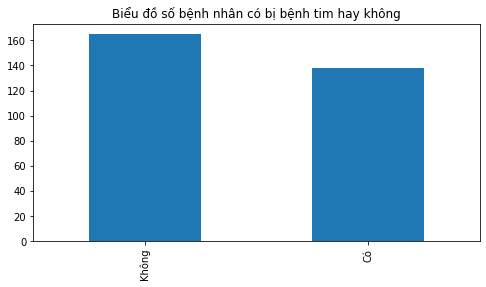

In [121]:
y.value_counts().plot(kind="bar", figsize=(8,4))
plt.xticks(ticks=[0,1], labels=["Không", "Có"])
plt.title("Biểu đồ số bệnh nhân có bị bệnh tim hay không")

In [122]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=.8, 
                                                    random_state=42)

In [123]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 2. Lựa chọn mô hình và hyperparameters 

Vì dữ liệu hiện tại thuộc vấn đề phân loại 'có' hoặc 'không', chúng ta cần sử dụng những mô hình thuộc vấn đề này. 

Còn `hyperparameters` giống như các nút bấm trên lò nướng, bạn có thể điều chỉnh để nấu món ăn yêu thích của mình.

In [124]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [125]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3. Fit mô hình với dữ liệu và sử dụng nó để đưa ra dự đoán

Việc Fit mô hình trên dữ liệu bao gồm việc truyền dữ liệu cho nó và yêu cầu nó tìm ra các đặc trưng.

Nếu có các nhãn (học có giám sát), mô hình sẽ cố gắng tìm ra mối quan hệ giữa dữ liệu và các nhãn.

Nếu không có nhãn (học không giám sát), mô hình sẽ cố gắng tìm các đặc trưng và gom nhóm các đặc trưng tương tự lại với nhau.







In [126]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 4. Sử dụng mô hình để dự đoán 

Mục tiêu của việc đào tạo một mô hình học máy là sử dụng nó để đưa ra dự đoán trong tương lai. 

Sau khi mô hình của chúng ta được đào tạo, bạn có thể sử dụng phương thức `predict()` để dự đoán giá trị `target` cho một tập hợp các đặc điểm mô hình chưa được học trước đó. Nói cách khác, sử dụng mô hình cùng với một số dữ liệu chưa được gắn nhãn để dự đoán nhãn cho nó. 



In [127]:
y_pred_labels = clf.predict(X_test)
y_pred_labels

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### 5. Đánh giá mô hình 

Sau khi dự đoán, chúng ta có thể bắt đầu sử dụng thêm một số phương pháp Scikit-Learn để đánh giá khả dự đoán của mô hình. 

Mỗi mô hình hoặc công cụ ước tính đều có một phương pháp đánh giá được xây dựng sẵn bên trong. Phương pháp so sánh khả năng mà mô hình có thể tìm hiểu các đặc giữa các đối tượng và nhãn. Nói cách khác, nó trả về độ chính xác của mô hình của bạn.




In [128]:
# Đánh giá mô hình trên tập dữ liệu train
clf.score(X_train, y_train)


1.0

In [129]:
# Đánh giá mô hình trên tập dữ liệu test 
clf.score(X_test, y_test)

0.8524590163934426

Ngoài ra còn có một số phương pháp đánh giá khác mà chúng ta có thể sử dụng cho các mô hình của mình (sẽ được đề cập ở những phần sau) 


### 6. Thử nghiệm và cải thiện mô hình 

Khi bạn đã có mô hình cơ sở, như chúng tôi có ở đây, điều quan trọng cần nhớ là, mô hình đầu tiên thường không phải là mô hình cuối cùng mà bạn sẽ sử dụng.

Thử nghiệm trên mô hình đầu tiên bạn xây dựng thường được gọi là mô hình cơ sở. Khi bạn đã có mô hình cơ sở, điều quan trọng cần nhớ rằng đây thường không phải là mô hình cuối cùng mà bạn sẽ sử dụng. 

Bước tiếp theo trong quy trình làm việc là thử và cải thiện mô hình cơ sở của bạn. Và để làm được điều này, có hai cách để xem xét nó. Từ góc độ mô hình và từ góc độ dữ liệu. Từ góc độ mô hình, điều này có thể liên quan đến những thứ như sử dụng một mô hình phức tạp hơn hoặc điều chỉnh siêu tham số mô hình của bạn. Từ góc độ dữ liệu, điều này có thể liên quan đến việc thu thập nhiều dữ liệu hơn hoặc dữ liệu chất lượng tốt hơn để mô hình hiện tại của bạn có nhiều cơ hội hơn để tìm hiểu các đặc trưng bên trong. 

Một điều bạn cần lưu ý là nếu bạn đang điều chỉnh hyperparameter của mô hình trong một loạt các thử nghiệm, và bạn phải luôn kiểm định chéo các dữ liệu trong mô hình. Kiểm định chéo là một cách để đảm bảo kết quả bạn nhận được nhất quán trên bộ dữ liệu đào tạo và kiểm tra của bạn (vì nó sử dụng nhiều phiên bản của tập dữ liệu `train` và `test`) thay vì chỉ trông chờ vào may mắn vì thứ tự của bộ `train` và `test` ban đầu.

+ Cố gắng điều chỉnh hyperparameter
+ Các parameter khác nhau nên được kiểm định chéo .
  + **Lưu ý**: Cẩn thận với kiểm định chéo đối với các vấn đề về **chuỗi thời gian**

Các mô hình khác nhau mà bạn sử dụng sẽ có cá hyperparameter khác nhau mà bạn có thể điều chỉnh. Đối với trường hợp của mô hình của chúng ta, `RandomForestClassifier()`, chúng ta sẽ bắt đầu thử các giá trị khác nhau cho `n_estimators`.






In [130]:
np.random.seed(42) 

for estimator in [10,50,100,200,500,1000] : 
  print(f"Mô hình với {estimator} estimators")
  model = RandomForestClassifier().fit(X_train, y_train)
  print(f"Độ chính xác của mô hình dự đoán : {model.score(X_test, y_test)*100:.2f}%")
  print("")


Mô hình với 10 estimators
Độ chính xác của mô hình dự đoán : 83.61%

Mô hình với 50 estimators
Độ chính xác của mô hình dự đoán : 85.25%

Mô hình với 100 estimators
Độ chính xác của mô hình dự đoán : 85.25%

Mô hình với 200 estimators
Độ chính xác của mô hình dự đoán : 81.97%

Mô hình với 500 estimators
Độ chính xác của mô hình dự đoán : 86.89%

Mô hình với 1000 estimators
Độ chính xác của mô hình dự đoán : 85.25%



Chúng ta có thể tự điều chỉnh hyperparameter bằng cách thủ công như trên. Nhưng nếu điều chỉnh nhiều hyperparamter, thì sẽ rất dài dòng. Do đó, bạn có thể sử dụng `GridSearchCV` trong `sklearn` để thử nghiệm với nhiều hyperparameter khác nhau 

In [131]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

param_grid = {"n_estimators" : [i for i in range(10,500,50)]}

grid = GridSearchCV(RandomForestClassifier(), 
                    param_grid, 
                    cv=5, 
                    verbose=1)
grid.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   18.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [132]:
grid.best_params_

{'n_estimators': 210}

In [133]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=210,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Với 'n_estimators' = 210, chúng ta sẽ có mô hình dự đoán tốt nhất, thử lại với mô hình gốc: 

In [134]:
clf = RandomForestClassifier(n_estimators=210)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=210,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
clf.score(X_test, y_test)

0.8688524590163934

### 6. Lưu và load mô hình 

Khi bạn đã thực hiện một vài thử nghiệm và bạn hài lòng với cách hoạt động của mô hình nào đó và muốn sử dụng lại sau này, bạn cần lưu nó lại 

Bạn có thể lưu mô hình scikit-learning bằng cách sử dụng mô-đun `pickle` được tích hợp sẵn trong Python.



In [136]:
# Lưu mô hình
import pickle 

pickle.dump(clf,open("heart_disease_model.pkl","wb"))

In [137]:
# Load mô hình 
loaded_model = pickle.load(open("heart_disease_model.pkl", "rb"))
loaded_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=210,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [138]:
loaded_model.score(X_test, y_test)

0.8688524590163934

## 2. Chuẩn bị dữ liệu 

Có 3 bước bạn cần thực hiện trong phần này : 
+ Tách dữ liệu thành 2 phần, đặc điểm (X) và nhãn (y) 
+ Xử lý dữ liệu khiếm khuyết 
+ Chuyển tất cả dữ liệu không phải là số thành dạng số

In [139]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [140]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


In [141]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [142]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    train_size=0.8, 
                                                    random_state=42)

In [144]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [145]:
len(X_train) / len(X)

0.7986798679867987

### 2.1. Xử lý dữ liệu bị khiếm khuyết 

Dữ liệu khiếm khuyến là trường hợp rất thường xảy ra khi chúng ta sử dụng bất kỳ dữ liệu nào. Trong machine learning, mô hình sẽ không thể nào được đào tạo nếu chúng ta đưa dữ liệu thô chưa được xử lý phần khiếm khuyết trước đó. Do đó, tiền đề để xây dựng một mô hình có thể đào tạo được là dữ liệu phải thực sự clean.

Như bạn có thể thấy, dữ liệu khi đưa vào mô hình Machine learning để train hay thử nghiệm được tách làm 2 phần, một là dữ liệu thể hiện đặc tính của đối tượng, phần còn lại là nhãn giúp mô hình có thể nhận diện đặc tính đó.

Khi tiến hành thử nghiệm dữ liệu vào mô hình, mô hình sẽ dự đoán nhãn dựa trên các biến đặc tính của đối tượng trong dữ liệu.

Với những dữ liệu khiếm khuyết, các biến đăc tính chúng ta có thể bổ sung bằng cách lấy giá trị phổ biến nhất của cột đó. Nhưng, nếu biến đó là nhãn thì chúng ta không thể làm điều này được, chỉ có một cách là xóa luôn dòng dữ liệu đó đi.

Quá trình lấp đầy dữ liệu bị thiếu được gọi là truyền dữ liệu **(data impulation)**.


In [146]:
!wget https://www.dropbox.com/s/3kjkori41wsi6s7/car-sales-extended-missing-data.csv

--2021-10-19 12:55:15--  https://www.dropbox.com/s/3kjkori41wsi6s7/car-sales-extended-missing-data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3kjkori41wsi6s7/car-sales-extended-missing-data.csv [following]
--2021-10-19 12:55:15--  https://www.dropbox.com/s/raw/3kjkori41wsi6s7/car-sales-extended-missing-data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc35adba796fa53fd9cf849617f3.dl.dropboxusercontent.com/cd/0/inline/BYVOrivLhUKhPmHG-tSv3zNCdaJ_87Dyl73bwn_5P-C4uiwaNAulPR9pWVTlZq6oNkkRcTU2kFlkSyNVT3cAbah5R8w8RL_DkTt-6gqdVrWuKcNZjy8xiCJoUOBLhLJdlnuUCTKw-uT9rwTBgOsHKWoE/file# [following]
--2021-10-19 12:55:16--  https://uc35adba796fa53fd9cf849617f3.dl.dropboxusercontent.com/cd/0/inline/BYVOrivLhUKhPmHG-tSv3

In [147]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [148]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [149]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Tiếp theo, xử lý phần khiếm khuyến của dữ liệu đặc trưng. 

#### 2.1.1 Xử lý dữ liệu khiếm khuyết với pandas

Những gì chúng ta sẽ làm là điền vào các hàng mà các giá trị phân loại bị thiếu là `missing`, đối với cột dữ liệu nào có kiểu số sẽ lấy trung bình hoặc với dữ liệu phân loại kiểu số như `Doors` chúng ta sẽ lấy giá trị phổ biến nhất. 


In [150]:
# Xử lý dữ liệu khiếm khuyết cho các biến đặc trưng
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(car_sales_missing["Doors"].median(), inplace=True) 
# Dữ liệu nhãn 
car_sales_missing.dropna(subset=["Price"],axis=0, inplace=True)

In [151]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

#### 2.1.2 Sử dụng Sklearn 

In [152]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [153]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Như thường lệ, chúng ta sẽ tách dữ liệu thành dữ liệu đặc trưng (X) và dữ liệu nhãn (y). 

In [154]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [155]:
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 

# Phân loại dữ liệu đặc trưng thành 3 nhóm : 
# Nhóm phân loại kiểu chuỗi (Make, Colour)
# Nhóm phân loại kiểu số (Doors)
# Nhóm kiểu số (Odometer (KM))

cat_features = ["Make", "Colour"]
door_feature = ["Doors"] 
num_features = ["Odometer (KM)"]

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing") 
door_imputer = SimpleImputer(strategy="constant", fill_value=car_sales_missing["Doors"].median())
num_imputer = SimpleImputer(strategy="mean")

imputer = ColumnTransformer([
                             ("cat_imputer", cat_imputer, cat_features), 
                             ("door_imputer", door_imputer, door_feature) ,
                             ("num_imputer", num_imputer, num_features)
], remainder="passthrough")

filled_X = imputer.fit_transform(X) 
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [156]:
# Sử dụng `np.concatenate()`  để gộp 2 cột X và y thành 1 mảng
car_sales_filled = np.concatenate([filled_X, y.to_numpy()[:,np.newaxis]],axis=1)
# Tạo DataFrame cho mảng trên
car_sales_filled_df = pd.DataFrame(car_sales_filled, columns=car_sales_missing.columns)
# Xóa dữ liệu khiếm khuyết từ Label Price 
car_sales_filled_df.dropna(subset=["Price"],axis=0,inplace=True)

In [157]:
car_sales_filled_df.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

### 2.2 Kiểu dữ liệu train mô hình 

Hầu hết các tập dữ liệu bạn gặp sẽ không ở dạng sẵn sàng để bắt đầu sử dụng chúng ngay lập tức với các mô hình Machine Learning. Và một số có thể cần chuẩn bị nhiều hơn những loại khác để sẵn sàng sử dụng.

Machine learning sẽ không hiểu ngôn ngữ mà chúng ta truyền tải đến, nó chỉ có thể hiểu khi dữ liệu cung cấp cho nó là những con số. Do đó, khi kết thúc quá trình này, bạn cần đảm bảo tất cả dữ liệu đều là những con số.
Giả sử dữ liệu hiện tại đầy đủ.  Quá trình này thường được gọi là **feature engineering** hay **feature encoding**. 



In [158]:
!wget https://www.dropbox.com/s/9xbsiu7c5h5awc7/car-sales.csv

--2021-10-19 12:55:16--  https://www.dropbox.com/s/9xbsiu7c5h5awc7/car-sales.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9xbsiu7c5h5awc7/car-sales.csv [following]
--2021-10-19 12:55:16--  https://www.dropbox.com/s/raw/9xbsiu7c5h5awc7/car-sales.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc689ec3eed76489ce66606b905a.dl.dropboxusercontent.com/cd/0/inline/BYW7bbQSroA5eZzsDyC3P1At1Z4GM9KxG_AC1j9AxgDeYuz_4XqKj4EYn7u9LGlLiQJhPU6C5v-g_u_4sZXIMDEZdBE-wcyp3ElMW2ojqN26_fHDC099dCEckOVXsLsAs2K7XTVQd6N0s5n3cH9TW4wY/file# [following]
--2021-10-19 12:55:17--  https://uc689ec3eed76489ce66606b905a.dl.dropboxusercontent.com/cd/0/inline/BYW7bbQSroA5eZzsDyC3P1At1Z4GM9KxG_AC1j9AxgDeYuz_4XqKj4EYn7u9LGlLiQJhPU6C5v-g_u_4sZXIMDE

In [159]:
car_sales = pd.read_csv("car-sales.csv")

In [160]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


Có thể thấy có một số cột không phải là kiểu số như `Make`, `Colour`, `Price`

In [161]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [162]:
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

Đôi khi dữ liệu có kiểu số nhưng nó lại không mang ý nghĩa của một con số, mà đúng hơn nó đại diện cho một nhóm thuộc loại nào. VD `Doors` là cửa xe, trong dữ liệu có giá trị 2,3,4 tượng trưng cho số  cửa của dòng xe đó. Chúng ta vẫn cần mã hóa chúng về dưới dạng phân 
loại.

Ngoài ra, để chuyển dữ liệu về kiểu số, có rất nhiều cách, dưới đây là một số cách bạn có thể tham khảo : 



#### 2.2.1 Sử dụng OneHotEncoder

In [163]:
# Sử dụng OneHotEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot = OneHotEncoder() # Khởi tạo instance cho class OneHotEncoder 
categorical_features = ["Make", "Colour", "Doors"] # Liệt kê những cột nào cần onehot

transformer = ColumnTransformer([
                                 ("one_hot", one_hot, categorical_features)
], remainder="passthrough") #remainder có "drop" (bỏ qua những cột nào không có trong categorical_features ) hoặc "passthrough" (lấy tất cả những cột không có trong categorical_features) 

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

Ngoài `OneHotEncoder` chúng ta có thể sử dụng `pd.get_dummies()` để mã hóa dữ liệu, cụ thể như sau : 

#### 2.2.2 Sử dụng pd.get_dummies

In [164]:
transformed_X_dummies = pd.get_dummies(X[categorical_features])
transformed_X_dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,0,0,1,0,0,0,0,1
1,4,0,1,0,0,0,0,0,1,0
2,3,0,0,0,1,0,1,0,0,0
3,5,1,0,0,0,1,0,0,0,0
4,4,0,0,1,0,0,0,0,0,1
5,4,0,0,0,1,0,0,1,0,0
6,4,0,1,0,0,0,1,0,0,0
7,4,0,1,0,0,0,1,0,0,0
8,4,0,0,0,1,0,0,0,0,1
9,4,0,0,1,0,0,0,0,0,1


Song, `pd.get_dummies()` chỉ mã hóa những dữ liệu nào không phải kiểu số. Do đó, bạn để ý sẽ thấy `Doors` vẫn chưa được mã hóa, giá trị nó vẫn giữ nguyên như ban đầu.

In [165]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


Nếu bạn để ý, `Doors` đang là kiểu `int`, để khắc phục vấn đề trên, chúng ta chỉ cần đổi nó sang kiểu khác là được

In [166]:
X["Doors"] = X["Doors"].astype(object)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


Thử lại `pd.get_dummies()` : 

In [167]:
transformed_X_dummies = pd.get_dummies(X[categorical_features])
transformed_X_dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0,0,0,1,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,1,0,0,1,0
2,0,0,0,1,0,1,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,1,0
5,0,0,0,1,0,0,1,0,0,0,1,0
6,0,1,0,0,0,1,0,0,0,0,1,0
7,0,1,0,0,0,1,0,0,0,0,1,0
8,0,0,0,1,0,0,0,0,1,0,1,0
9,0,0,1,0,0,0,0,0,1,0,1,0


Nhưng như vậy vẫn chưa xong, nhãn của dữ liệu chúng ta vẫn chưa mã hóa, nó vẫn còn kiểu `object`. Chúng ta cần loại bỏ giá trị `$` và chuyển về kiểu số. Bạn có thể sử dụng biểu thức chính quy Regular Regex để loại bỏ nó đi hoặc cách nào đó bạn có thể tìm hiểu : 

In [168]:
y

0     $4,000.00
1     $5,000.00
2     $7,000.00
3    $22,000.00
4     $3,500.00
5     $4,500.00
6     $7,500.00
7     $7,000.00
8     $6,250.00
9     $9,700.00
Name: Price, dtype: object

In [169]:
import re 
def convertPriceToFloat(txt) : 
  rm_signal = re.sub(r"\$","", txt) # Bỏ ký hiệu $ 
  fmt_number = re.sub(r",","", rm_signal).strip() # Định dạng theo ký hiệu số học của Python
  return float(fmt_number)
y = y.apply(convertPriceToFloat)

In [170]:
y

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
7     7000.0
8     6250.0
9     9700.0
Name: Price, dtype: float64

Lúc này, `X` và `y` đều được định dạng kiểu số, bạn có thể tách dữ liệu thành train và test và đưa vào mô hình. 

#### 2.2.3 Sử dụng API trong Pandas

Đối với dữ liệu có quá nhiều cột, chúng ta sẽ không thể nào thực hiện thủ công bằng cách liệt kê từng cột cụ thể như với `OneHotEncoder` được, mà cần phải sử dụng kỹ thuật vòng lặp để nó tự mã hóa dữ liệu đó. Trong pandas, có API có thể giúp chúng ta thực hiện điều này. Xem quá trình thực hiện dưới đây : 


In [171]:
!wget https://www.dropbox.com/s/5darjkw4uya85wk/car-sales-extended.csv

--2021-10-19 12:55:17--  https://www.dropbox.com/s/5darjkw4uya85wk/car-sales-extended.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5darjkw4uya85wk/car-sales-extended.csv [following]
--2021-10-19 12:55:18--  https://www.dropbox.com/s/raw/5darjkw4uya85wk/car-sales-extended.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca29539be7fbdf33b323d7d8a42.dl.dropboxusercontent.com/cd/0/inline/BYXdZoeEa29nhZ8L13pKbkfGAZu78nJVKyrjtNAl-Oipv6BlTaBTT_-VdMP5V6tL5-VvG5Jtxb0VW80fdDHqrGO82YWZV-c_1Ds2hUVsxhWg0QvukeYMlIFAXOO_NXHFZ_W5JAtcZNa9VwM19jbXRXEX/file# [following]
--2021-10-19 12:55:18--  https://uca29539be7fbdf33b323d7d8a42.dl.dropboxusercontent.com/cd/0/inline/BYXdZoeEa29nhZ8L13pKbkfGAZu78nJVKyrjtNAl-Oipv6BlTaBTT_-VdMP5

In [172]:
car_sales= pd.read_csv("car-sales-extended.csv")

In [173]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [174]:
# Kiểm tra xem dữ liệu cột Make có phải kiểu String hay không
pd.api.types.is_string_dtype(car_sales["Make"])

True

In [175]:
pd.api.types.is_string_dtype(car_sales["Price"])

False

In [176]:
# Tìm kiếm những cột có kiểu dữ liệu string
for col, values in car_sales.items() : 
  if pd.api.types.is_string_dtype(values) : 
    print(col)

Make
Colour


2 cột `Make` và `Colour` trong `car_sales` có chứa dữ liệu kiểu `string`. Chúng ta sẽ `encode` dữ liệu này về thành các giá trị category. Xem chi tiết tại : https://pandas.pydata.org/docs/user_guide/categorical.html

In [177]:
for col, values in car_sales.items() : 
  if pd.api.types.is_string_dtype(values) : 
    car_sales[col] =  values.astype("category").cat.as_ordered()

In [178]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Make           1000 non-null   category
 1   Colour         1000 non-null   category
 2   Odometer (KM)  1000 non-null   int64   
 3   Doors          1000 non-null   int64   
 4   Price          1000 non-null   int64   
dtypes: category(2), int64(3)
memory usage: 25.9 KB


In [179]:
car_sales["Make"].cat.categories

Index(['BMW', 'Honda', 'Nissan', 'Toyota'], dtype='object')

In [180]:
car_sales["Make"].cat.codes

0      1
1      0
2      1
3      3
4      2
      ..
995    3
996    2
997    2
998    1
999    3
Length: 1000, dtype: int8

### 3. Tách dữ liệu thành train và test 

Để phục vụ cho những phần sau, chúng ta sẽ có 2 nhóm dữ liệu gồm phân loại `(heart_disease)` và hồi quy `(car_sales)`

## Lựa chọn mô hình 

Khi bạn đã chuẩn bị xong dữ liệu, bước tiếp theo là chọn mô hình hoặc thuật toán Machine learning thích hợp để tìm các đặc trưng trong dữ liệu của bạn.

> 🔑 **Lưu ý** :
>
> Sklearn đề cập đến các mô hình học máy và thuật toán làm công cụ ước lượng như : 
+ Đối với vấn đề dự đoán phân loại, thỉnh thoảng chúng ta sẽ thấy từ `clf` (viết tắt của classification)  được sử dụng làm tên biến của ước lượng phân loại
+ Đối với Bài toán hồi quy - dự đoán một con số (giá bán ô tô).
+ Vấn đề không được giám sát - phân cụm (nhóm các đặc trưng không có nhãn với các đặc trưng không được dán nhãn tương tự khác).

[Scikit-Learn algorithm cheatsheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) sẽ là nơi bạn cần tìm mô hình phù hợp với vấn đề đang cần giải quyết. 

![](https://scikit-learn.org/stable/_static/ml_map.png)









### 3.1 Lựa chọn mô hình với vấn đề phân loại 

Chúng ta sẽ lấy `hearth_disease` làm dữ liệu để lựa chọn mô hình : 

In [181]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [182]:
len(heart_disease)

303

Chúng ta có 303 dữ liệu mẫu (1 hàng = 1 mẫu) và sẽ dự đoán liệu một bệnh nhân có bị bệnh tim hay không.

![](https://images.ctfassets.net/tln063yrioga/1tSrar5Ji6IlfSFDi1x0Gr/1a24c9632b7b0c98d07221fed3278498/sklearn-ml-map-cheatsheet-heart-disease-linear-svc.png?h=800)


In [183]:
from sklearn.svm import SVC
# Tách dữ liệu thành train và test
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X,y, train_size=0.8, random_state=42)
# Khởi tạo mô hình và fit 
clf = SVC(max_iter=1000).fit(X_train_boston, y_train_boston)
clf.score(X_test_boston,y_test_boston)

0.7049180327868853

Mô hình dự đoán dữ liệu bệnh nhân có bị bệnh tim hay không đạt độ chính xác ~70%, con số có vẻ khá tốt. Nhìn vào sơ đồ, liệu còn mô hình nào tốt hơn không?  

![](https://images.ctfassets.net/tln063yrioga/4OMgaNDFztHBD513OnZRm8/932cd631c201d06539c70ce0587a7629/sklearn-ml-map-cheatsheet-heart-disease-ensemble.png?h=800) 

Theo đường dẫn, chúng ta lại đến với [`EnsembleMethods`](https://scikit-learn.org/stable/modules/ensemble.html). 


In [184]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train_boston, y_train_boston)
clf.score(X_test_boston, y_test_boston)

0.8524590163934426

Có thể thấy `RandomForestClassifier` train mô hình đạt độ chính xác vượt trội hơn so với `SVC`. Một điều cần nhớ, là cả hai mô hình vẫn chưa nhận được bất kỳ điều chỉnh hyperparameter nào. Việc Điều chỉnhhyperparameter là một thuật ngữ để chỉ đến việc điều chỉnh một số tham số đã được cấu hình sẵn trên mô hình để thử và làm cho nó tốt hơn. Nó thường xảy ra khi bạn đã tìm thấy một kết quả cơ bản tốt nhưng bạn muốn cải thiện nó tốt hơn.

Chúng ta sẽ sử dụng mô hình tốt nhất để điều chỉnh hyperparameter, nhưng việc điều chỉnh này sẽ thực hiện ở phần sau. 




### 3.2 Lựa chọn mô hình với vấn đề hồi quy

Với vấn đề hồi quy, chúng ta sẽ dự đoán giá trị nào đó bất kỳ tự các đặc trựng của đối tượng trong dữ liệu cho trước. Cụ thể, chúng ta sẽ dự đoán giá nhà đất ở **Boston** với tập dữ liệu sẵn có trong `sklearn`. 

In [185]:
from sklearn.datasets import load_boston

In [186]:
help(load_boston)

Help on function load_boston in module sklearn.datasets._base:

load_boston(return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============   ==============
    Samples total               506
    Dimensionality               13
    Features         real, positive
    Targets           real 5. - 50.
    ==============   ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        'DESCR', the full description of the dataset,
        and 'filename', the physical location of boston
        

In [187]:
boston = load_boston()

In [188]:
boston_data = boston.data
boston_target = boston.target
boston_df = pd.DataFrame(boston_data, columns=boston.feature_names)
boston_df["TARGET"] = boston_target
boston_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [189]:
boston_df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TARGET     False
dtype: bool

Mục tiêu của chúng ta là sử dụng các cột đặc tính, chẳng hạn như `CRIM`, là tỷ lệ tội phạm bình quân đầu người theo thị trấn, `AGE`, tỷ lệ độ tuổi bình quân của người chủ sở hữu nhà đất. Trong đó cột `TARGET` là giá nhà trung bình.

Mỗi hàng là một thị trấn khác nhau ở Boston (dữ liệu) và chúng ta cố gắng xây dựng mô hình để dự đoán giá nhà trung bình (nhãn) của một thị trấn với một loạt các thuộc tính về thị trấn.

Vì chúng ta có dữ liệu và nhãn, đây là một vấn đề học có giám sát. Và vì đang dự đoán một con số, đó là một vấn đề hồi quy.

![](https://images.ctfassets.net/tln063yrioga/49SQP1s6ilttxoe2EBW0r3/a337cc9533e74a0bdd2913c9abee20d0/sklearn-ml-map-cheatsheet-boston-housing-ridge.png?h=800)

Theo dõi bản đồ, nó gợi ý chúng ta thử [`RidgeRegression`](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression). 



In [190]:
from sklearn.linear_model import Ridge

# Tách dữ liệu thành train và test
X = boston_df.drop("TARGET", axis=1)
y = boston_df["TARGET"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X,y, train_size=0.8, random_state=42)

model = Ridge()
model.fit(X_train_reg, y_train_reg)
model.score(X_test_reg, y_test_reg)

0.6662221670168522

Điều gì sẽ xảy ra nếu `RidgeRegression` không hoạt động hoặc nó không đáp ứng được khả năng như kỳ vọng?

![](https://images.ctfassets.net/tln063yrioga/4U47jKiHrFBvL5Go2Ca9r4/17c017335ebd1cd83e3fe56be992d240/sklearn-ml-map-cheatsheet-boston-housing-ensemble.png?h=800) 

Một trong những phương pháp tổng hợp phổ biến nhất khi xây dựng mô hình Machine learning với dữ liệu có cấu trúc là [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forest) với thời gian đào tạo và dự đoán nhanh và khả năng thích ứng với các vấn đề khác nhau.

Tiền đề cơ bản của RandomForest là kết hợp một số Decision tree khác nhau, mỗi cây ngẫu nhiên với nhau và đưa ra dự đoán trên một mẫu bằng cách lấy trung bình kết quả của mỗi cây quyết định.

Vì chúng ta đang giải quyết vấn đề hồi quy, chúng ta sẽ sử dụng [`RandomForestRegressor'] của Scikit-Learn (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).






In [191]:
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor().fit(X_train, y_train)
model.score(X_test, y_test)

0.5442353448275863

Với `RandomForestRegressor`, độ phù hợp của mô hình trên dữ liệu đạt 89.5%, cao hơn rất nhiều so với `Ridge` chỉ đạt 66.6%. 

## 4. Điều chỉnh (Fit) mô hình trên dữ liệu và thực hiện dự đoán 

Chúng ta đã biết được cách chọn mô hình trong Machine learning, bước kế tiếp cần phải làm là để nó học dữ liệu và thực hiện dự đoán. 



### 4.1 Điều chỉnh mô hình trên dữ liệu 

Trong Scikit-Learn, quá trình để một mô hình học máy học các đặc trưng từ tập dữ liệu liên quan đến việc gọi phương thức `fit()` và truyền dữ liệu vào nó, chẳng hạn như, `fit(X, y)`.

Trong đó X là mảng chứa các đặc trưng và y là mảng đích.

+ `X` còn có những tên khác như : dữ liệu (data), (biến) đặc trưng (feature variables). 
+ `y` có thể gọi : Nhãn (label), biến đích (target variables). 

Đối với học có giám sát thường có một X và y. Đối với việc học không có giám sát, không có y (không có nhãn).






In [192]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train_clf, y_train_clf)

# Check the score of the model (on the test set)
clf.score(X_test_clf, y_test_clf)

0.8524590163934426

Việc gọi phương thức `fit()` sẽ khiến thuật toán học máy cố gắng tìm các đặc trưng của X và nó sẽ liên kết các đặc trưng ấy thành môt biến để nhớ là y. Hoặc nếu không có y, nó sẽ chỉ tìm thấy các đặc trưng trong X và tạo thành một nhóm giữ đặc trưng riêng cho nó.






### 4.2 Thực hiện dự đoán 

Bây giờ chúng ta đã có một mô hình được đào tạo, một mô hình đã học các đặc trưng trong dữ liệu một cách chuyên sâu, bạn sẽ muốn sử dụng nó để đưa ra dự đoán.

Scikit-Learn cho phép điều này theo một số cách. Hai trong số những cách phổ biến và hữu ích nhất là  [`predict()`](https://github.com/scikit-learn/scikit-learn/blob/5f3c3f037/sklearn/multiclass.py#L299) và [`predict_proba()`](https://github.com/scikit-learn/scikit-learn/blob/5f3c3f037/sklearn/linear_model/_logistic.py#L1617).




In [193]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

Cho dữ liệu ở dạng `X`, `predict()` sẽ trả về các nhãn ở dạng `y`.

Thông lệ tiêu chuẩn là lưu các dự đoán này vào một biến có tên như `y_preds` để sau này so sánh với `y_test` hoặc `y_true`(thường giống y_test chỉ là một tên khác).



In [194]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

Một cách khác để làm điều này là với hàm `accuracy_score()` của Scikit-Learn. 




In [195]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_preds)

0.8524590163934426

**Lưu ý**: Để hàm dự `predict()` hoạt động, nó phải được truyền X (dữ liệu) theo cùng định dạng mà mô hình đã được đào tạo. Bất cứ điều gì khác biệt và nó sẽ trả về một lỗi.

`predict_proba()` trả về xác suất xảy ra của của một nhãn phân loại trong danh sách toàn bộ các nhãn trong đó.




In [196]:
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs[0]

array([0.89, 0.11])

Chẳng hạn, phần tử đầu tiên của kết của dự đoán là [0.89,0.11] nghĩa là xác suất xảy ra ở nhãn vị trí thứ 0 là 89%, vị trí thứ 1 là 11%. Thông thường, chúng ta sẽ lấy nhãn nào có xác suất cao nhất để làm đại diện dự đoán cho đối tượng đó. Do đó, phần tử đầu tiên của list `y_pred_probs` là `0`. 

## 5. Đánh giá mô hình 

Khi mô hình được train, điều tiếp theo chúng ta cần quan tâm là tính toán khả năng dự đoán của mô hình trên dữ liệu thử nghiệm, tức là dữ liệu mà mô hình chưa được 'nhìn thấy' bao giờ. 

Trong Sklearn, có 3 phương thức khác nhau để đánh giá mô hình : 
1. Phương thức `score()` có sẵn trong `model` hoặc `clf` sẽ trả về một chỉ số (metric) được liên kết với loại mô hình bạn đang sử dụng, chẳng hạn với mô hình phân loại (classification) sẽ là độ chính xác trung bình (mean accurcay), đối với mô hình hồi quy, phương thức này được xem như là $R^2$ để đánh giá sự phù hợp của kết quả dự đoán trên mô hình. 
2. Tham số `scoring` được truyền vào `cross_val_score()` hay `GridSearchCV()` để yêu cầu Sklearn một loại chỉ số tính điểm cụ thể. 
3. Một số phương pháp đo lường cụ thể cho từng vấn đề có sẵn trong `sklearn.metrics` 




### 5.1 Đánh giá chung với phương thức `score()` 

Trước tiên, chúng ta sẽ đánh giá trên mô hình phân loại `clf` đã được thực hiện ở trên. 

In [197]:
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, train_size=0.8, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train_clf, y_train_clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Khi mô hình đã gọi phương thức `fit()` trên dữ liệu `train`, chúng ta có thể gọi phương thức `score()` sau đó trên dữ liệu `test`, dữ liệu mà mô hình chưa được train bao giờ.
 



In [198]:
clf.score(X_test_clf, y_test_clf)

0.8688524590163934

Vì `clf` là một instance của `RandomForestClassifier`, nên phương thức `score()` sử dụng độ chính xác trung bình (mean accuracy) làm phương pháp tính điểm của nó.

Phía sau phương thức `score()` nó đưa ra các dự đoán trên `X_test_clf` bằng cách sử dụng mô hình được train  và sau đó so sánh các dự đoán đó với các nhãn thực tế `y_test_clf`.

Nếu mô hình dự đoán chính xác mọi thứ thì score sẽ là 1 (tương ứng 100%). 

Tuy nhiên, mô hình của chúng ta chỉ đạt 0.85 (tương ứng 85%). Tuy nhiên, đó cũng là con số khá tốt. 

Tiếp theo, chúng ta sẽ đánh giá **mô hình hồi quy** với phương thức `score()` 



In [199]:
from sklearn.ensemble import RandomForestRegressor 

X = boston_df.drop("TARGET", axis=1)
y = boston_df["TARGET"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X,y, 
                                                                    train_size=0.8,
                                                                    random_state=42)

model = RandomForestRegressor() 
model.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [200]:
model.score(X_test, y_test)

0.4975782327586208

Với mô hình hồi quy, `score()` chính là hệ số $R^2$ thể hiện độ phù hợp giữa biến được dự đoán với các biến đặc trưng của mô hình. 

Hệ số $R^2$ được tính theo công thức :  $R^2 = 1- \frac{u}{v}$. 

Trong đó:
- `u` :là phần dư tổng bình phương `((y_true - y_pred) ** 2).sum()` 
- `v` : là tổng tổng bình phương `((y_true - y_true.mean())**2).sum()`

Điểm tốt nhất có thể là 1,0 và nó có thể là số âm (vì mô hình có thể xấu hơn). Một mô hình không đổi luôn dự đoán giá trị kỳ vọng của y, bỏ qua các đặc tính input sẽ nhận được điểm $R^2$ là 0


### 5.2 Đánh giá mô hình dựa trên dữ liệu chéo

Tiếp theo, chúng ta sẽ tìm `score()` với `cross_val_score()` và `GridSearchCV()`

Như bạn có thể đã đoán, phương thức `score()` sẽ có cách tính toán khác nhau tùy thuộc vào vấn đề bạn đang giải quyết.

Chúng ta sẽ thấy một số ví dụ cụ thể về các tham số khác nhau nhưng trước tiên hãy kiểm tra `cross_val_score()`.






In [201]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train_clf, X_test_clf , y_train_clf, y_test_clf = train_test_split(X, 
                                                                     y,
                                                                     train_size=0.8,  
                                                                     random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train_clf, y_train_clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [202]:
clf.score(X_test_clf, y_test_clf)

0.8524590163934426

In [203]:
cross_val_score(clf, X, y,cv=5)

array([0.81967213, 0.8852459 , 0.7704918 , 0.8       , 0.75      ])

Có thể thấy điểm khác biệt đầu tiên là số lượng output xuất ra giữa 2 phương thức `score()` và `cross_val_score()`. Trong khi `score()` chỉ có thể tạo ra được 1 giá trị, thì `cross_val_score()` có thể xuất ra một mảng nhiều giá trị. 

`cross_val_score()` trả về một mảng vì trong nó có một tham số được gọi là `cv`, viết tắt của cross-validation, tức là kiểm định chéo, có thể hiểu dữ liệu tổng thể được chia ngẫu nhiên 5 lần, mỗi lần lấy 80% dữ liệu để train, 20% dữ liệu để test. Và với mỗi lần tương ứng với dữ liệu không giống như lần trước đó, nó sẽ cho ra giá trị dự  đoán chính xác khác nhau.

Tham số `cv` có giá trị mặc định là 5 

![](https://images.ctfassets.net/tln063yrioga/4BieaE4PPIiqVe8IfYAqTM/32ad336d7dfd0ce2cd4eb75e9d1e4fc2/sklearn-cross-validation.png?h=800) 

Trước khi thực hiện `cross_val_score()`, chúng ta làm theo cách thông thường, chia dữ liệu thành `train` và `test` và sau đó, mô hình dựa vào dữ liệu đó để train và chỉ tạo ra được 1 kết quả dự đoán. 

Trong khi đó, `cross_val_score()` với tham số `cv` tương ứng với số lần tạo ra ngẫu nhiên dữ liệu sẽ giúp cho quá trình train và test mô hình được diễn ra nhiều lần. Do đó, chúng ta sẽ có một mảng các kết quả dự đoán chính xác khác nhau trong. 

Từ giá trị `cross_val_score()`, chúng ta có thể lấy giá trị trung bình thay vì để các phần tử rời rạc. 







In [204]:
clf_single_score = clf.score(X_test_clf, y_test_clf)
clf_cross_value_score = np.mean(cross_val_score(clf, X,y))
clf_single_score, clf_cross_value_score

(0.8524590163934426, 0.8216939890710384)

Trong trường hợp này, nếu bạn được yêu cầu báo cáo độ chính xác mô hình của mình, tuy là nó thấp hơn, nhưng bạn nên số liệu được kiểm định chéo hơn là số liệu không được kiểm định chéo.




### 5.3 Các phương pháp đánh giá mô hình 

#### 5.3.1 Mô hình phân loại

Có 4 phương pháp chính để áp dụng đánh giá mô hình phân loại : 
1. Accuracy 
2. Area under ROC curve 
3. Confusion matrix
4. classification report 


##### Accuracy

`accuracy` là phương pháp mặc định cho hàm `score()` trong mỗi mô hình phân loại của Scikit-Learn. Và nó có thể phương pháp được sử dụng nhiều nhất và cơ bản nhất cho các vấn đề phân loại.






In [205]:
from sklearn.metrics import accuracy_score 

y_preds_clf = clf.predict(X_test_clf) 

accuracy_score(y_preds_clf, y_test_clf)

0.8524590163934426

##### Area Under Receiver Operating Characteristic (ROC) Curve

Thường được viết tắt từ AUC hoặc ROC. 

Đường cong ROC được sử dụng để so sánh tỉ lệ true positive với false positive. 

+ True positive : mô hình dự đoán 1, giá trị thực 1
+ False positive : mô hình dự đoán 1, giá trị thực 0
+ True Negative : mô hình dự đoán 0, giá trị thực 0 
+ False Negative : mô hình dự đoán 0, giá trị thực 1 




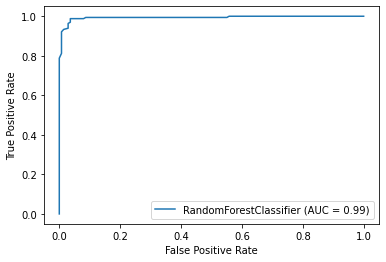

In [206]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X,y)

In [207]:
from sklearn.metrics import roc_curve 

y_preds_clf = clf.predict_proba(X_test_clf)

fpr, tpr, threshold = roc_curve(y_test_clf, y_preds_clf[:,1])

fpr, tpr


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.06896552, 0.13793103, 0.13793103, 0.13793103, 0.17241379,
        0.17241379, 0.20689655, 0.20689655, 0.27586207, 0.4137931 ,
        0.55172414, 0.62068966, 0.68965517, 0.68965517, 0.72413793,
        0.79310345, 0.82758621, 0.89655172, 1.        ]),
 array([0.     , 0.03125, 0.09375, 0.15625, 0.40625, 0.40625, 0.46875,
        0.5    , 0.59375, 0.625  , 0.6875 , 0.71875, 0.78125, 0.8125 ,
        0.84375, 0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875, 0.96875,
        0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     , 1.     ,
        1.     ]))

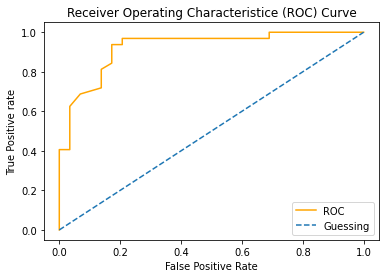

In [208]:
def plot_roc_curve(fpr,tpr) : 
  """
  Plot ROC curve given the false positive rate (fpr) and true positive rate(tpr)
  """
  plt.plot(fpr, tpr, color="orange", label="ROC")
  plt.plot([0,1],[0,1], "--", label="Guessing")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive rate")
  plt.title("Receiver Operating Characteristice (ROC) Curve")
  plt.legend()
plot_roc_curve(fpr,tpr)

Một phương pháp đo lường bạn có thể sử dụng để định lượng đường cong ROC trong một số duy nhất là AUC (Diện tích dưới đường cong). Scikit-Learn thực hiện một hàm để tính toán điều này được gọi là `roc_auc_score()`.

Điểm ROC AUC tối đa mà bạn có thể đạt được là 10 và nói chung, càng gần 1, mô hình càng tốt.


In [209]:
from sklearn.metrics import roc_auc_score 

y_preds = clf.predict(X_test)

roc_auc_score(y_test_clf, y_preds)

0.8512931034482758

Vị trí lý tưởng nhất để đường cong ROC chạy dọc theo góc trên cùng bên trái trục đồ thì. 

Điều này có nghĩa là mô hình chỉ dự đoán những kết quả true positive và không có những kết quả false positive. Điều này sẽ dẫn đến điểm ROC AUC là 1.


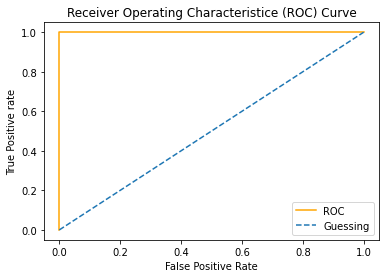

In [210]:
fpr, tpr, threshold = roc_curve(y_test_clf, y_test_clf)

plot_roc_curve(fpr, tpr)

Trong thực tế, một đường cong ROC hoàn hảo là khó có thể xảy ra.


##### Confusion matrix

Ma trận nhầm lẫn là một cách nhanh chóng để so sánh các nhãn mà mô hình dự đoán và các nhãn thực mà nó được cho là dự đoán. Về bản chất, cung cấp cho bạn một ý tưởng về nơi mà mô hình đang bị nhầm lẫn.


In [211]:
from sklearn.metrics import confusion_matrix 

y_preds_clf = clf.predict(X_test_clf)

cm = confusion_matrix(y_test_clf, y_preds_clf)
cm



array([[24,  5],
       [ 4, 28]])

Sử dụng `pd.crosstab()` để có thể dễ dàng quan sát confusion matrix

In [212]:
pd.crosstab(y_test, y_preds_clf, rownames=["Actual label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual label,,
0,24,5
1,4,28


Ngoài ra, bạn còn có thể biểu diễn matrix này dưới dạng đồ thị heatmap 

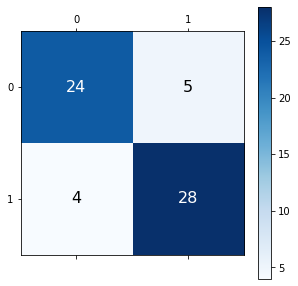

In [213]:
import matplotlib.pyplot as plt 
import itertools 

fig, ax = plt.subplots(figsize=(5,5))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

threshold = (cm.max() + cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1]) ) : 
  plt.text(j,i, cm[i,j], va="center", ha="center", fontsize=16, color="white" if cm[i,j] > threshold else "black" )

Ngoài ra, bạn có thể sử  dụng `plot_confution_matrix()` để vẽ heatmap này một cách nhanh chóng

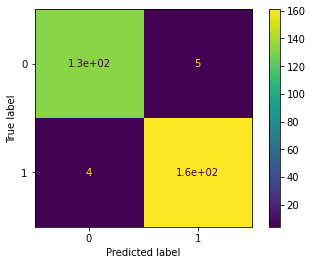

In [214]:
from sklearn.metrics import plot_confusion_matrix 

plot_confusion_matrix(clf, X, y)

##### Classification report 

Là tập hợp tất cả các phương pháp đo lường. 

In [215]:
from sklearn.metrics import classification_report 

print(classification_report(y_test_clf, y_preds_clf))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Trong bản báo cáo này, bạn sẽ nhận được 4 cột gồm  precision, recall, f1-score and support. Cùng với đó đó, mỗi dòng thể hiện class  khác nhau nhưng luôn có sự xuất hiện của `accuracy`, `macro avg` và `weighted avg`. 

![](https://www.programmersought.com/images/982/3abe32ca67071270d8f1f8f5f92a025e.png) 

+ **Support** : Số lượng mẫu của mỗi phương pháp đo. 
+ **Accuracy** : Độ chính xác trung bình của mô hình 
+ **Macro avg** : accuracy, recall và f1 trung bình giữa các class. 
+ **Weighted avg** : Trung bình có trọng số, là trọng số của độ  accuracy, recall và f1 trung bình giữa các class. Có trọng số có nghĩa là mỗi số liệu được tính theo số lượng mẫu có trong mỗi lớp. Chỉ số này sẽ ưu tiên cho class chiếm đa số (ví dụ: nó sẽ cho giá trị cao khi một class được thực hiện nhiều hơn class khác).


> 🔑 Tóm tắt : 
>
> + Accuracy là phương pháp tốt để khởi đầu hoặc đánh giá sơ bộ hoặc mô hình có sự cân bằng về số lượng giữa các nhãn.  
> + Precision và recall rất quan trọng trong việc đánh giá số lượng các class không đồng đều






#### 5.3.2 Mô hình hồi quy 

Một số phương pháp để đánh giá mô hình hồi quy : 
+ **R^2** : Đánh giá khả năng giải thích của các biến đặc trưng đến mô hình. 
+ **Mean absolute Error (MAE)** : Giá trị trung bình của khoản chênh lệch tuyệt đối giữa biến dự đoán và giá trị thực tế. Nó cung cấp cho bạn một ý tưởng về mức độ sai lầm của dự đoán của bạn.
+ **Mean squared Error (MSE)** : Mức chênh lệch được bình phương và lấy trung bình giữa các dự đoán và giá trị thực tế. Bình phương các lỗi loại bỏ các negative error. Nó cũng khuếch đại các giá trị ngoại lai (các mẫu có sai số lớn hơn).






In [216]:
from sklearn.ensemble import RandomForestRegressor 

X = boston_df.drop("TARGET", axis=1)
y = boston_df["TARGET"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X,y,train_size=0.8, random_state=42)

model = RandomForestRegressor()
model.fit(X_train_reg, y_train_reg)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

##### R^2 - Hệ số xác định (coefficient of determination) 

Khi mô hình được train xong, bạn có thể tìm R^2 với phương thức `score()` 

In [217]:
model.score(X_test_reg, y_test_reg)

0.8816294636522362

R^2 có giá trị 0.87 có nghĩa là mô hình với các biến độc lập (đặc trưng) có thể giải thích 87% sự biến động về giá nhà đất ở Boston. 

Ngoài việc sử dụng phương thức `score()` trong mô hình hồi quy để tính R^2, chúng ta còn có một cách khác để lấy R^2 trong sklearn 

In [218]:
from sklearn.metrics import r2_score

y_preds_reg = model.predict(X_test_reg)

r2_score(y_test_reg, y_preds_reg,)

0.8816294636522362

Và hệ số xác định R^2 đạt đến hoàn hảo (=1) khi giá trị dự đoán hoàn toàn giống với giá trị thực tế nhưng điều này sẽ không thể xảy ra. 



In [219]:
r2_score(y_test_reg, y_test_reg)

1.0

Ngoài phương pháp sử dụng hệ số xác định R^2 để tìm mức độ phù hợp của mô hình, cũng như khả năng giải thích của các biến đặc trưng đối với giá trị dự đoán, chúng ta còn cố một số phương pháp để đo lường khả năng dự đoán của mô hình hồi quy như **MAE**, **MSE**

##### Mean Absolute Error (MAE)

Mean Absolute Error đo lường độ chênh lệch trung bình giữa giá trị dự đoán với giá trị thực sự. Công thức : 

$MAE = \frac{\sum_{i=1}^n|\hat{y_i}-y_i|}{n}$

Với : 
+ $\hat{y_i}$ : Giá trị dự đoán
+ $y_i$ : Giá trị thực 
+ $n$ : Tổng số mẫu

In [220]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test_reg, y_preds_reg)

2.141852941176471

Mô hình của chúng ta đạt MAE là 2.141. Điều này có nghĩa là, trung bình các giá trị dự đoán mô hình chênh lệch 2.141 đơn vị so với giá trị thực tế.


In [221]:
df = pd.DataFrame({"predict" : y_preds_reg, 
                   "actual" : y_test_reg
                   })

df

,predict,actual
173,23.171,23.6
274,30.012,32.4
491,18.139,13.6
72,23.653,22.8
452,16.453,16.1
...,...,...
412,13.196,17.9
436,12.265,9.6
411,13.669,17.2
86,20.140,22.5


Tùy thuộc vào vấn đề bạn đang giải quyết, độ lệch có thể đòi hỏi độ chính xác phải cao hơn (MAE phải thấp hơn nưa), nhưng trong trường hợp này có thể chấp nhận được. 

Chúng ta sẽ tạo biểu đồ quan sát giá trị 



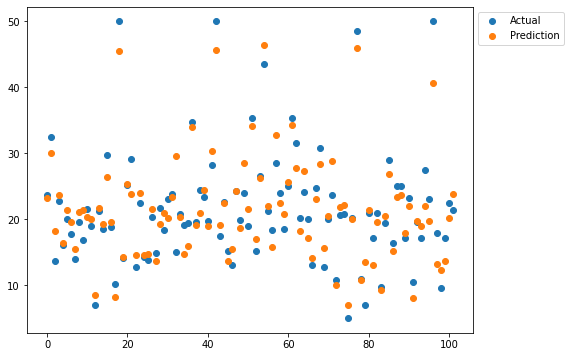

In [222]:
fig, ax = plt.subplots(figsize=(8,6))
x = np.arange(0,len(df))
ax.scatter(x,df["actual"], label="Actual")
ax.scatter(x, df["predict"], label="Prediction")
ax.legend(bbox_to_anchor=(1,1))

##### Mean squared Error (MSE) 

MSE sẽ luôn luôn cao hơn MAE vì độ chênh lệch giữa giá trị dự đoán và giá trị thực tế được tính theo trung bình của tổng bình phương thay vì chỉ tính trung bình của tổng chênh lệch bằng giá trị tuyệt đối như MAE.


In [223]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_reg, y_preds_reg)

8.68055924509804

> Các phương pháp đánh giá khác nhau sẽ có ý nghĩa cho từng trường hợp, và nhu cầu khác nhau. 
+ R^2 sẽ cho chúng ta có sự đánh giá tổng quát và nhanh chóng về khả năng dự đoán của mô hình. Nếu R^2 càng gần 1 thì mô hình càng tốt, nhưng nó không thực sự phản ánh được mức độ sai lệch trong mỗi dự đoán trong mô hình của bạn. 
+ MAE cung cấp một dấu hiệu tốt hơn về mức độ chênh lệch trung bình của mỗi dự đoán trong mô hình của bạn.
+ MSE sẽ khuếch đại mức độ chênh lệch giữa các giá trị dự đoán với giá trị thực tế. Giả sử : 
  + Đối với MAE : Khi giá trị Bitcoin tăng từ `52000$` lên `60000$`, giá trị chênh lệch được tính là 8000
  + Đối với MSE : Khi giá trị Bitcoin tăng từ `52000$` lên `60000$`, giá trị chênh lệch được tính là 8000^2 để thấy được độ lệch nó lớn cỡ nào. 




## 6. Cải thiện mô hình dự đoán

Những dự đoán đầu tiên bạn thực hiện với một mô hình thường được gọi là những dự đoán cơ sở. Điều này cũng xảy ra với các chỉ số đánh giá đầu tiên mà bạn nhận được. Chúng thường được gọi là số liệu cơ sở.

Mục tiêu của chúng ta là cải thiện mô hình sao cho các đánh giá vượt qua được những đánh giá cơ sở này. 

Có hai trong số các phương pháp chính để cải thiện các chỉ số cơ sở là từ góc độ dữ liệu và góc độ mô hình.

Từ góc độ dữ liệu hỏi:
+ Liệu có thể tăng cường thêm dữ liệu cho mô hình train hay không? Trong machine learning, dữ liệu càng nhiều sẽ giúp mô hình học được nhiều các đặc trưng cho từng nhãn hơn, từ đó khả năng dự đoán của mô hình có thể được tốt hơn. 
+ Liệu có thể cải thiện chất lượng dữ liệu? Không phải lúc nào nhiều dữ liệu là tốt, đôi khi nó còn ngược lại, vì chất lượng dữ liệu không tốt sẽ làm mô hình học dữ liệu trở nên khó nhận biết đâu là đặc trưng mà nó cần phải nắm để tìm ra nhãn của đối tượng dữ liệu đó. 

Từ góc độ mô hình: 
+ Liệu có mô hình nào tốt hơn mô hình hiện tại? Nếu bạn đã bắt đầu với một mô hình đơn giản, bạn có thể sử dụng một mô hình phức tạp hơn hay không? 
+ Liệu rằng điều chỉnh các hyperparameter của mô hình hiện tại có làm mô hình tốt hơn không? 

> 🔑**Lưu ý** : Các đặc trưng trong dữ liệu cũng thường được gọi là các tham số dữ liệu. Sự khác biệt giữa **parameter** và **hyperparameter** là mô hình học máy tự tìm kiếm các **parameter** trong dữ liệu, trong khi đó **hyperparameter** là những tham số được xây dựng sẵn có thể được người dùng như chúng ta có thể điều chỉnh

Cụ thể hơn, chúng ta sẽ xem xét cách chúng ta có thể cải thiện các mô hình `RandomForestClassifier` và `RandomForestRegressor` thông qua điều chỉnh **hyperparameter**.





In [224]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

Khi bạn khởi tạo một mô hình như trên, bạn đang sử dụng các hyperparameter mặc định. Sử dụng phương thức `get_param()` để lấy các giá trị mặc định của hyperparameter này : 




In [225]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Trong các `params` trên, bạn cần quan tâm một số tham số quan trọng như : `max_depth`, `min_samples_split`, `n_estimators`. 

Bạn có thể nghĩ về hyperparameters tương tự như mặt số trên lò nướng. Nếu mở lò nướng lên mà không cần chỉnh thêm nút gì thì lò nướng của bạn có thể thực hiện tốt công việc nấu bữa ăn yêu thích của bạn. Nhưng nếu điều chỉnh nhỏ, bạn sẽ thấy nó hoạt động tốt hơn khi bạn điều chỉnh cài đặt. 

![](https://images.ctfassets.net/tln063yrioga/6gT0iC1ee3rbM3UnN96hbI/57720f106921f48412c6864c8f84e098/sklearn-hyperparameter-tuning-oven.png?h=800)

Trong machine learning cũng vậy, cải thiện mô hình, chúng ta có thể điều chỉnh hyperparameter trong nó. Có thể các hyperparameter mặc định trên mô hình có thể tìm thấy các đặc trưng trong dữ liệu. Nhưng có khả năng việc điều chỉnh các siêu tham số có thể cải thiện tốt hơn khả năng học của mô hình. Mỗi mô hình machine learning sẽ có các hyperparameter khác nhau mà bạn có thể điều chỉnh.

Chẳng hạn, bạn có thể điều chỉnh các hyperparameter bằng cách đọc [Scikit-Learn documentation for the Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), bạn sẽ thấy họ đề nghị cố gắng thay đổi `n_estimators` (số lượng trees trong forest) và `min_samples_split` (số lượng mẫu tối thiểu cần thiết để tách một node bên trong). 

Chúng tôi sẽ thử điều chỉnh những điều này cũng như:
* `max_features` (the number of features to consider when looking for the best split)
* `max_depth` (the maximum depth of the tree)
* `min_samples_leaf` (the minimum number of samples required to be at a leaf node)

Để trở nên quen thuộc với việc điều chỉnh hyperparameter, chúng ta sẽ thực hiện theo 3 cách.

1. Bằng thủ công
2. Lựa chọn các giá trị ngẫu nhiên với [RandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
3. Thử tuần tự tất cả các giá trị kết hợp với nhau với [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)





### 6.1 Tinh chỉnh hyperparameter thủ công 

Từ đầu bài viết, chúng ta chỉ tách dữ liệu làm 2 phần, dụng để train và phần còn lại để đánh giá mô hình với dữ liệu test. 

Tuy nhiên, chúng ta có thể tách dữ liệu ra thêm 1 phần nữa là validation dùng để kiểm định lại dữ liệu sau mỗi quá trình train hoàn tất. Như vây, dữ liệu chúng ta gồm 3 phần : train, validation và test. 

Nếu tập dữ liệu ban đầu của chúng ta chứa 100 hồ sơ bệnh nhân khác nhau cho biết ai mắc bệnh tim và ai không mắc bệnh và chúng ta muốn xây dựng một mô hình machine learning để dự đoán ai mắc bệnh tim và ai không mắc bệnh tim, nó có thể trông như thế này:

![](https://images.ctfassets.net/tln063yrioga/39C51etqLFgB0oFIormSep/e1890b8fb69651c2935a531009d6df29/sklearn-train-valid-test-annotated.png?h=800)

Vì chúng ta đang xây dựng mô hình với `RandomForestClassifier` và các hyperparameter muốn điều chỉnh sẽ sẽ gồm : 






In [226]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Chúng ta sẽ thay đổi : 
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

Dữ liệu sẽ được chia làm 3 phần, 70% cho `train`, 15% cho `validation`, 15% còn lại cho `test`. 

Ngoài ra, chúng ta cũng sẽ cần phải đánh giá mô hình nhiều lần với các hyperparameter được thay đổi khác nhau. Do đó, để thuận tiện, chúng ta sẽ tạo một hàm để đánh giá mô hình sẵn : 



In [250]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_preds(y_true, y_preds) : 
  """
  Perform evaluate comparision y_true labels with y_pred labels
  """
  accuracy = accuracy_score(y_true, y_preds) 
  precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_preds, average="weighted")
  metric_dict = {
      "accuracy" : accuracy, 
      "precision" : precision, 
      "recall" : recall, 
      "f1" : fscore
  }

  return metric_dict

Trước tiên, chúng ta cần tính số liệu cơ sở

In [251]:
from sklearn.ensemble import RandomForestClassifier 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

np.random.seed(42)

# Trước tiên chúng ta sẽ tạo train test, và 
X_train, X_rest, y_train, y_rest = train_test_split(X,
                                                    y,
                                                    train_size=0.7,
                                                    random_state=42
                                                    )


X_valid, X_test, y_valid, y_test = train_test_split(X_rest,
                                                    y_rest,
                                                    train_size=0.5,
                                                    random_state=42)
clf = RandomForestClassifier() 
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

{'accuracy': 0.8666666666666667,
 'f1': 0.8666666666666667,
 'precision': 0.8666666666666667,
 'recall': 0.8666666666666667}

Chúng tôi sẽ thay đổi 1 trong các siêu tham số, `n_estimators` thành 100 và xem liệu nó có cải thiện trên tập xác thực hay không.


In [252]:
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

y_preds_2 = clf_2.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

{'accuracy': 0.8222222222222222,
 'f1': 0.8222222222222222,
 'precision': 0.8222222222222222,
 'recall': 0.8222222222222222}

Đó là cách để thay đỏi hyperparameter. 

Tuy nhiên, nếu cần phải thay đổi nhiều hyperparameter,chúng ta không thể nào sử dụng thủ công như vậy được. 

### 6.2 Tinh chỉnh hyperparameter với RandomizeSearchCV 

`RandomizedSearchCV` của Scikit-Learn cho phép chúng ta tìm kiếm ngẫu nhiên trên các hyperparameter khác nhau để xem cái nào hoạt động tốt nhất. Nó cũng lưu trữ thông tin chi tiết về những thứ hoạt động tốt nhất!





In [259]:
grid = {
    "n_estimators" : np.arange(10,500,30) , 
    "max_depth" : np.arange(1,20,2), 
    "max_features" : ["auto", "sqrt"], 
    "min_samples_split" : [2,4,6], 
    "min_samples_leaf" : [1,2,4]
}


In [261]:
from sklearn.model_selection import RandomizedSearchCV 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=42
                                                    )

clf = RandomForestClassifier() 

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20,
                            cv=5, 
                            verbose=2)

rs_clf.fit(X_train, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=310, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=17 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=310, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=17, total=   0.5s
[CV] n_estimators=310, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=17 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=310, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=17, total=   0.5s
[CV] n_estimators=310, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=17 
[CV]  n_estimators=310, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=17, total=   0.5s
[CV] n_estimators=310, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=17 
[CV]  n_estimators=310, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=17, total=   0.5s
[CV] n_estimators=310, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=17 
[CV]  n_estimators=310, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=17, total=   0.5s
[CV] n_estimators=310, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=11 
[CV]  n_estimators=310, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=11, total=   0.5s
[CV] n_estimators=310, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   46.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [263]:
rs_clf.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 220}

In [262]:
y_preds_3 = rs_clf.predict(X_test)

clf_3_metrics = evaluate_preds(y_test, y_preds_3)
clf_3_metrics

{'accuracy': 0.8524590163934426,
 'f1': 0.8522997278821265,
 'precision': 0.8526009509616066,
 'recall': 0.8524590163934426}

Có thể thấy mô hình thứ 3 này vẫn chưa thể vượt qua được mô hình cơ sở. Khi sử dụng `RandomSearchCV`, nó sẽ lựa chọn ngẫu nhiên một giá trị cho một key, rồi sau đó tạo thành một cặp và tiến hành train. Do đó, nó sẽ không thể nào kết hợp toàn bộ các tham số này với tham số khác được.

Để kết hợp các tham số với nhau được đầy đủ mà không phải bắt cặp ngẫu nhiên, chúng ta có thể sử dụng `GridSearchCV` 


### 6.3 Tinh chỉnh hyperparameter với GridSearchCV

In [264]:
grid = {
    "n_estimators" : np.arange(10,300, 50) , 
    "max_depth" : np.arange(1,15,3) , 
    "max_features" : ["auto", "sqrt"], 
    "min_samples_split" : [2,4,6,8] , 
    "min_samples_leaf" : [1,2,4]
}

In [268]:
from sklearn.model_selection import GridSearchCV 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    train_size=0.8, 
                                                    random_state=42)


clf = RandomForestClassifier() 

gs_clf = GridSearchCV(clf, 
                      param_grid=grid, 
                      n_jobs=-1,
                      verbose=1
                      )
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 10.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [269]:
gs_clf.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 60}

In [271]:
y_preds_4 = gs_clf.predict(X_test)

clf_4_metrics = evaluate_preds(y_test, y_preds_4)
clf_4_metrics

{'accuracy': 0.8852459016393442,
 'f1': 0.8851220105749872,
 'precision': 0.8854765453126109,
 'recall': 0.8852459016393442}

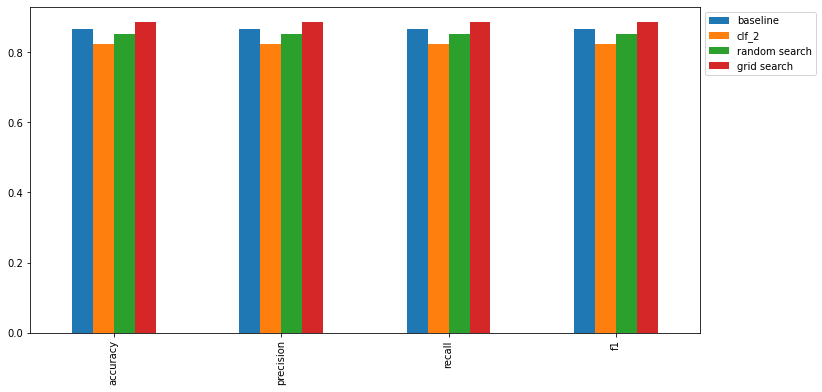

In [278]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics, 
                                "clf_2" : clf_2_metrics, 
                                "random search" : clf_3_metrics, 
                                "grid search" : clf_4_metrics})

compare_metrics.plot.bar(figsize=(12,6)).legend(bbox_to_anchor=(1,1))

## 7. Lưu mô hình 

### 7.1 Lưu mô hình bằng `pickle` 

In [280]:
import pickle 

pickle.dump(gs_clf, open("grid_search_cv.pkl", "wb"))

In [283]:
loaded_gs_clf = pickle.load(open("grid_search_cv.pkl", "rb"))

In [285]:
pickle_y_preds = loaded_gs_clf.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

{'accuracy': 0.8852459016393442,
 'f1': 0.8851220105749872,
 'precision': 0.8854765453126109,
 'recall': 0.8852459016393442}

## 8. Tổng hợp quá trình thực hiện

In [287]:
car_sales = pd.read_csv("car-sales-extended-missing-data.csv")

car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [289]:
car_sales.isna().any()

Make             True
Colour           True
Odometer (KM)    True
Doors            True
Price            True
dtype: bool

In [320]:
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

car_sales.dropna(subset=["Price"],inplace=True)
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline([
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="missing value")), 
                                    ("one_hot" , OneHotEncoder(handle_unknown="ignore"))
])
door_feature = ["Doors"] 


door_transformer = Pipeline([
                             ("imputer", SimpleImputer(strategy="median")),
                             ("one_hot", OneHotEncoder())
])

number_features = ["Odometer (KM)"]
number_transformer = Pipeline([
                               ("imputer", SimpleImputer(strategy="mean"))
])

preprocessor = ColumnTransformer(transformers=[
                        ("cat", categorical_transformer,categorical_features), 
                        ("door" , door_transformer, door_feature ), 
                        ("num", number_transformer, num_features)
])

model = Pipeline(steps=[
                        ("preprocessor", preprocessor), 
                        ("model", RandomForestRegressor())
])

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8)

model.fit(X_train, y_train)
model.score(X_test,y_test)


0.2645746921505331

In [323]:
pipe_grid = {
    "preprocessor__num__imputer__strategy" : ["mean", "median"] , 
    "model__n_estimators" : np.arange(10,220,50), 
    "model__max_depth" : np.arange(1,15,3), 
    "model__max_features" : ["auto", "sqrt"], 
    "model__min_samples_split" : np.arange(1,9,3), 
    "model__min_samples_leaf" : np.arange(1,9,3)
}

In [324]:
gs_model = GridSearchCV(estimator=model, 
                     param_grid=pipe_grid, 
                     cv=5, 
                     verbose=2
                      )

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_feat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test par

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, mo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ


[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=1, model__min_s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, mo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ


[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=4, model__mi

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=auto, model__min_samples_leaf=7, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=1, model__mi

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=1, model__max_features=sqrt, model__min_samples_leaf=7, model__mi

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, mo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=4, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=auto, model__min_samples_leaf=7, model__mi

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=1, model__mi

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=4, model__mi

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=4, model__max_features=sqrt, model__min_samples_leaf=7, model__mi

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=auto, model__min_samples_leaf=7, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=1, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=4, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, mo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_l

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=7, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, mo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_l

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, mo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=1, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=4, mod

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_l

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_l

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=auto, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=auto, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, mo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=4, model_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=10, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, mode

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=60, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=110, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_l

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=160, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=1, model__n_estimators=210, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=13, model__max_features=sqrt, model__min_samples_leaf=7, model_

[Parallel(n_jobs=1)]: Done 4500 out of 4500 | elapsed: 12.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [325]:
gs_model.best_params_

{'model__max_depth': 4,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 7,
 'model__n_estimators': 10,
 'preprocessor__num__imputer__strategy': 'mean'}

In [326]:
gs_model.score(X_test,y_test)

0.33692633699807156